##コードで使うパッケージを導入する

<u>**pandas**</u> は、データフレーム(DataFrame)などの独自のデータ構造が提供されており、様々な処理が可能だ。<br>
**numpy** は,Pythonの数値計算ライブラリの一種であり、NumPyは多次元配列オブジェクトをPythonに実装し、多数の演算関数を提供する。<br>
**pyplot**は、図形を作成する時に使う。<br>
**seaborn**は、Pythonの可視化ライブラリの一つである。 SeabornはMatplotlibの機能をより美しく、より簡単に実現するための可視化ライブラリだ。<br>
**google drive** 上に作業を行うため、google drive のパッケージも導入する。<br>
最初のデータ処理のためsklearnパッケージの中の**preprocessing**は標準化する(MinMax Normalized) と**LabelEncoder**（数字化）


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

##Google Drive からデータを引き出す。

In [ ]:
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv"
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


##データを理解する
データを詳しく分析するためデータの構成をみる。<br>
この場合、**info**を使うといい

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

以上の情報からみると、全部２４コラムがあり、データ数は145460個がある。<br>
学習を行う前に注意しないといけないことは：<br>
**1>** NaNであるデータ要素を処理しなければならない。 <br>
**2>** 目的要素は明日が雨か否かため、日時、位置などのデータが関係のないだろう。そのデータを削除するべきだ。<br>
**3>** 比数字のデータもあるため、このデータを数字化する必要。<br>


#初期データ処理

## NaNであるデータ要素を処理しなければならない。 <br>
## 日時、位置などのデータを削除するべきだ。

In [ ]:
#カテゴリー別でNaNの数を検査する
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
#パーセントで表示する
for x in df:
    print(x,"では",np.round(df[x].isnull().mean()*100,4),'％データが欠けている')

Date では 0.0 ％データが欠けている
Location では 0.0 ％データが欠けている
MinTemp では 1.0209 ％データが欠けている
MaxTemp では 0.8669 ％データが欠けている
Rainfall では 2.2419 ％データが欠けている
Evaporation では 43.1665 ％データが欠けている
Sunshine では 48.0098 ％データが欠けている
WindGustDir では 7.0989 ％データが欠けている
WindGustSpeed では 7.0555 ％データが欠けている
WindDir9am では 7.2639 ％データが欠けている
WindDir3pm では 2.9066 ％データが欠けている
WindSpeed9am では 1.2148 ％データが欠けている
WindSpeed3pm では 2.105 ％データが欠けている
Humidity9am では 1.8246 ％データが欠けている
Humidity3pm では 3.0984 ％データが欠けている
Pressure9am では 10.3568 ％データが欠けている
Pressure3pm では 10.3314 ％データが欠けている
Cloud9am では 38.4216 ％データが欠けている
Cloud3pm では 40.8071 ％データが欠けている
Temp9am では 1.2148 ％データが欠けている
Temp3pm では 2.4811 ％データが欠けている
RainToday では 2.2419 ％データが欠けている
RainTomorrow では 2.246 ％データが欠けている


30%　以上データがNaNで有れば学習を実行する時にはモデルが悪要素になるのでそのカーラムを取り消す:　Cloud3pm,Cloud9am,Sunshine,Evaporation

In [ ]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df = df.dropna(axis=0)

In [ ]:
#check
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df.shape

(112925, 17)

## 非数字データを数字化する

In [ ]:
df_categotical= df.loc[:,df.dtypes ==object]
col_name = df_categotical.columns
col_name

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [ ]:
le = LabelEncoder()
for x in col_name:
    df[x]=le.fit_transform(df[x])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


##データのバランスを検討する

The percentage of Rain Tomorrow = yes over total is: 22.16 %
Imbalanced Datasets


<Axes: title={'center': 'Balanced Check'}, ylabel='RainTomorrow'>

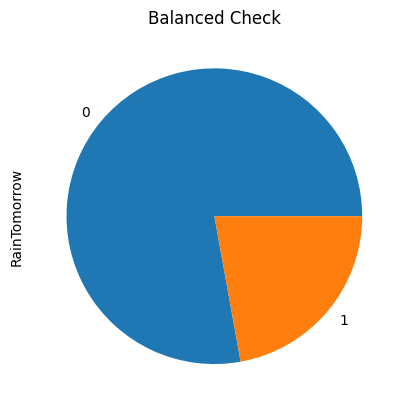

In [ ]:
rain = df["RainTomorrow"].mean()
print("The percentage of Rain Tomorrow = yes over total is:",np.round(x*100,2),"%")
if x<0.5:
    print("Imbalanced Datasets")
else: print("Balanced Datasets")

df.RainTomorrow.value_counts().plot(kind='pie',title='Balanced Check')

##データのバランスが欠けているためoversamplingをしなければならない
##その前にデータ全体を標準化する

In [ ]:
scaler = preprocessing.MinMaxScaler()
df_ =scaler.fit_transform(df)
scaled_df =pd.DataFrame(df_,columns=df.columns)
scaled_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.513064,0.446154,0.001632,0.866667,0.289062,0.866667,0.933333,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.461894,0.446667,0.0,0.0
1,0.370546,0.494505,0.000000,0.933333,0.289062,0.400000,1.000000,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.468822,0.502222,0.0,0.0
2,0.501188,0.507692,0.000000,1.000000,0.304688,0.866667,1.000000,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.556582,0.477778,0.0,0.0
3,0.413302,0.558242,0.000000,0.266667,0.132812,0.600000,0.000000,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.489607,0.551111,0.0,0.0
4,0.610451,0.652747,0.002720,0.866667,0.265625,0.066667,0.466667,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.482679,0.622222,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X= scaled_df.drop(columns=['RainTomorrow'])
y = scaled_df['RainTomorrow']
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0.0: 87906, 1.0: 25019})


In [ ]:
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X,y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 87906, 1.0: 87906})


<Axes: ylabel='RainTomorrow'>

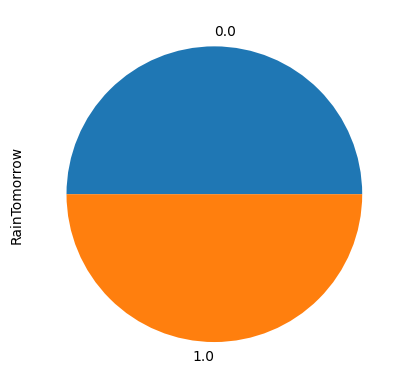

In [ ]:
y_res.value_counts().plot(kind='pie')

#データを学習する
##Heatmap

In [ ]:
df_res = X_res.copy()
df_res['RainTomorrow']= y_res.copy()
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175812 entries, 0 to 175811
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        175812 non-null  float64
 1   MaxTemp        175812 non-null  float64
 2   Rainfall       175812 non-null  float64
 3   WindGustDir    175812 non-null  float64
 4   WindGustSpeed  175812 non-null  float64
 5   WindDir9am     175812 non-null  float64
 6   WindDir3pm     175812 non-null  float64
 7   WindSpeed9am   175812 non-null  float64
 8   WindSpeed3pm   175812 non-null  float64
 9   Humidity9am    175812 non-null  float64
 10  Humidity3pm    175812 non-null  float64
 11  Pressure9am    175812 non-null  float64
 12  Pressure3pm    175812 non-null  float64
 13  Temp9am        175812 non-null  float64
 14  Temp3pm        175812 non-null  float64
 15  RainToday      175812 non-null  float64
 16  RainTomorrow   175812 non-null  float64
dtypes: float64(17)
memory usage: 

<Axes: >

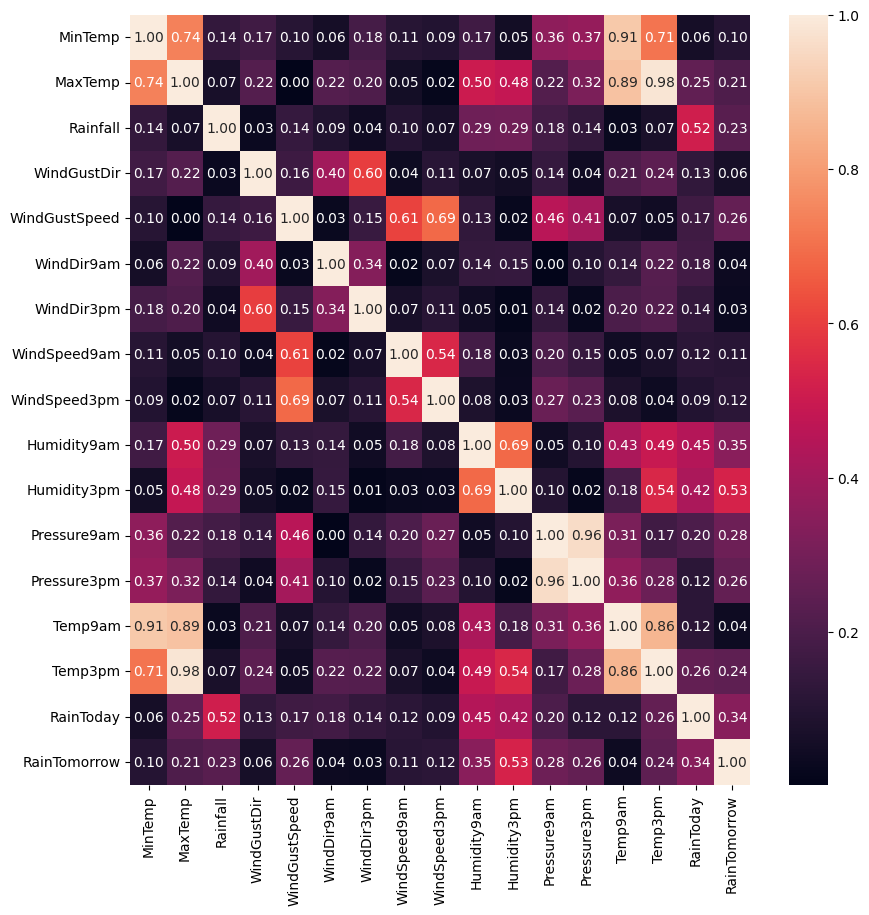

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_res.corr().abs(), annot=True, fmt="0.2f")

Heatmapから見ると "MinTemp"　,"WindGustDir"　,"WindDir9am"　,"WindDir3pm"　,"WindSpeed9am"　,"WindSpeed3pm"　,"Temp9am" が相対性が低いためこの学習時にはこのデータを使用しない方がいいと考える

In [ ]:

ls=["MinTemp","WindGustDir","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Temp9am"]
x=X_res.drop(columns=ls)
y=y_res

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#学習する
今回のレポートでは**Linear Regression** (線形) と **Multi-layer Perceptron Classifier** (非線形) のぱっけーじを使用する


##Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
LR_score= accuracy_score(y_test, pred_LR)

##Multi-layer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = (16,16,16,16)   # 隠れ層（hidden layers）のサイズ, default: (100,)
activation = "relu"              # 隠れ層に与える非線形性, default: "relu"
random_state = 314               # ネットワークの初期化に使う乱数シード（ニューラルネットワークの初期化は確率過程なのでシードで固定する）．

mlpc = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    random_state=random_state,
    max_iter=100,
    verbose=True
)
print(mlpc)

MLPClassifier(hidden_layer_sizes=(16, 16, 16, 16), max_iter=100,
              random_state=314, verbose=True)


In [ ]:
mlpc.fit(x_train,y_train)
pred_mplpc = mlpc.predict(x_test)
mplpc_score= mlpc.score(x_test, y_test)

Iteration 1, loss = 0.50121340
Iteration 2, loss = 0.46527729
Iteration 3, loss = 0.46267023
Iteration 4, loss = 0.46098223
Iteration 5, loss = 0.45920176
Iteration 6, loss = 0.45861207
Iteration 7, loss = 0.45731862
Iteration 8, loss = 0.45644030
Iteration 9, loss = 0.45443478
Iteration 10, loss = 0.45322597
Iteration 11, loss = 0.45237543
Iteration 12, loss = 0.45016791
Iteration 13, loss = 0.44926302
Iteration 14, loss = 0.44806173
Iteration 15, loss = 0.44781611
Iteration 16, loss = 0.44678170
Iteration 17, loss = 0.44603599
Iteration 18, loss = 0.44538467
Iteration 19, loss = 0.44458423
Iteration 20, loss = 0.44411528
Iteration 21, loss = 0.44322145
Iteration 22, loss = 0.44299352
Iteration 23, loss = 0.44247888
Iteration 24, loss = 0.44271462
Iteration 25, loss = 0.44213040
Iteration 26, loss = 0.44182649
Iteration 27, loss = 0.44208767
Iteration 28, loss = 0.44114418
Iteration 29, loss = 0.44178159
Iteration 30, loss = 0.44103144
Iteration 31, loss = 0.44074339
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


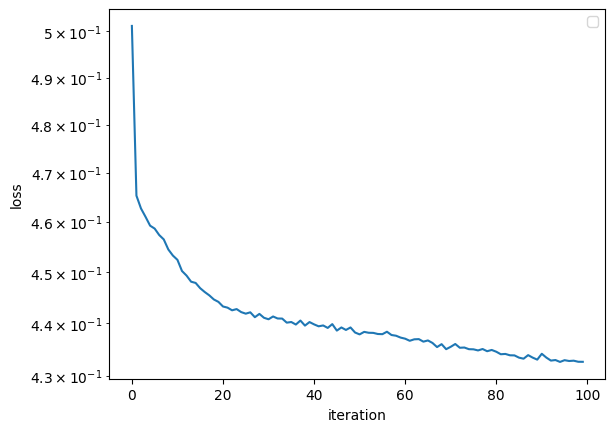

In [ ]:
plt.figure()
plt.plot(mlpc.loss_curve_)
plt.legend()              # 凡例を付ける
plt.yscale("log")         # y軸を対数スケールにする
plt.xlabel("iteration")   # x軸に与える名前
plt.ylabel("loss")        # y軸に与える名前
plt.show()

#結果

##MPL Classifier
学習した上で結果を見ると79%ぐらい結果が正しいことがわかった。
恐らく、初期のデータのバランスがよくないため正しい率に影響することを考えられる。
##Linear Regression
同じく78％の正確りつが出てきた。

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78     17591
         1.0       0.77      0.82      0.80     17572

    accuracy                           0.79     35163
   macro avg       0.79      0.79      0.79     35163
weighted avg       0.79      0.79      0.79     35163



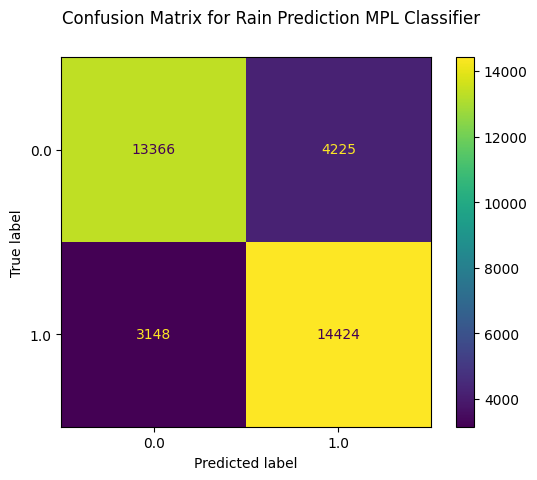

In [ ]:
print(classification_report(y_test, pred_mplpc))
from sklearn.metrics import ConfusionMatrixDisplay
fig = ConfusionMatrixDisplay.from_estimator(mlpc, x_test, y_test, display_labels=mlpc.classes_)
fig.figure_.suptitle("Confusion Matrix for Rain Prediction MPL Classifier ")
plt.show()

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     17591
         1.0       0.79      0.77      0.78     17572

    accuracy                           0.78     35163
   macro avg       0.78      0.78      0.78     35163
weighted avg       0.78      0.78      0.78     35163



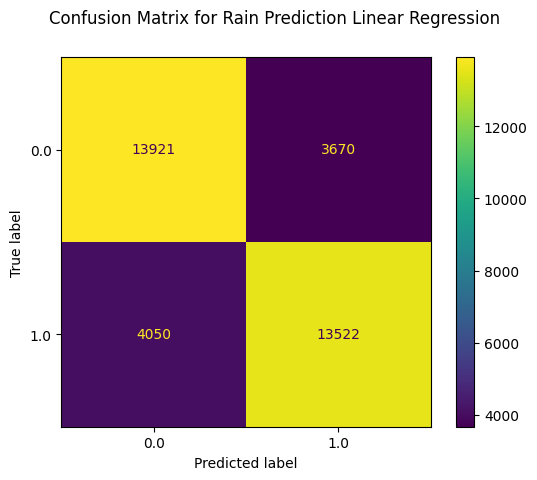

In [ ]:
print(classification_report(y_test, pred_LR))
from sklearn.metrics import ConfusionMatrixDisplay
fig = ConfusionMatrixDisplay.from_estimator(LR, x_test, y_test, display_labels=LR.classes_)
fig.figure_.suptitle("Confusion Matrix for Rain Prediction Linear Regression")
plt.show()

#問題を発展する
以上の結果では正解率が高くないため、学習要素を狭くしても最終の結果には正解率が低くなった。

In [ ]:
print("LS Linear Regression Score is: ",np.round(LR_score,4)*100,'%')
print("LS Multi-layer Perceptron Classifier Score is: ",np.round(mplpc_score,4)*100,'%')

LS Linear Regression Score is:  78.05 %
LS Multi-layer Perceptron Classifier Score is:  79.03 %


In [ ]:
ls2=["Humidity9am","Humidity3pm","Pressure9am","RainToday"]
x2=X_res[ls2].copy()
y2=y_res

In [ ]:
x2.head()

,Humidity9am,Humidity3pm,Pressure9am,RainToday
0,0.71,0.22,0.449587,0.0
1,0.44,0.25,0.497521,0.0
2,0.38,0.30,0.447934,0.0
3,0.45,0.16,0.613223,0.0
4,0.82,0.33,0.500826,0.0


In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2)

In [ ]:
LR.fit(x2_train,y2_train)
pred_LR2 = LR.predict(x2_test)
LR_score2= accuracy_score(y2_test, pred_LR2)

In [ ]:
mlpc.fit(x2_train, y2_train)
pred_mplpc2 = mlpc.predict(x2_test)
mplpc_score2= mlpc.score(x2_test, y2_test)

Iteration 1, loss = 0.51362914
Iteration 2, loss = 0.49091659
Iteration 3, loss = 0.48917661
Iteration 4, loss = 0.48787870
Iteration 5, loss = 0.48653742
Iteration 6, loss = 0.48598034
Iteration 7, loss = 0.48550718
Iteration 8, loss = 0.48518882
Iteration 9, loss = 0.48485043
Iteration 10, loss = 0.48492560
Iteration 11, loss = 0.48454672
Iteration 12, loss = 0.48457043
Iteration 13, loss = 0.48442512
Iteration 14, loss = 0.48391916
Iteration 15, loss = 0.48362393
Iteration 16, loss = 0.48350220
Iteration 17, loss = 0.48322050
Iteration 18, loss = 0.48321613
Iteration 19, loss = 0.48281794
Iteration 20, loss = 0.48259599
Iteration 21, loss = 0.48264239
Iteration 22, loss = 0.48261819
Iteration 23, loss = 0.48220856
Iteration 24, loss = 0.48219892
Iteration 25, loss = 0.48205602
Iteration 26, loss = 0.48217125
Iteration 27, loss = 0.48210273
Iteration 28, loss = 0.48226231
Iteration 29, loss = 0.48213331
Iteration 30, loss = 0.48199353
Iteration 31, loss = 0.48216507
Iteration 32, los

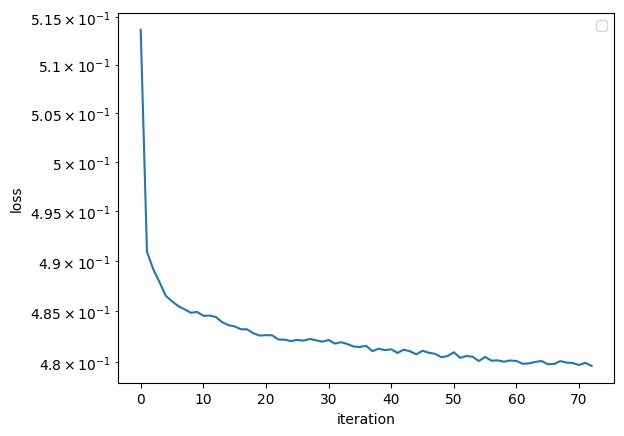

In [ ]:
plt.figure()
plt.plot(mlpc.loss_curve_)
plt.legend()              # 凡例を付ける
plt.yscale("log")         # y軸を対数スケールにする
plt.xlabel("iteration")   # x軸に与える名前
plt.ylabel("loss")        # y軸に与える名前
plt.show()

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78     17651
         1.0       0.80      0.70      0.75     17512

    accuracy                           0.77     35163
   macro avg       0.77      0.76      0.76     35163
weighted avg       0.77      0.77      0.76     35163



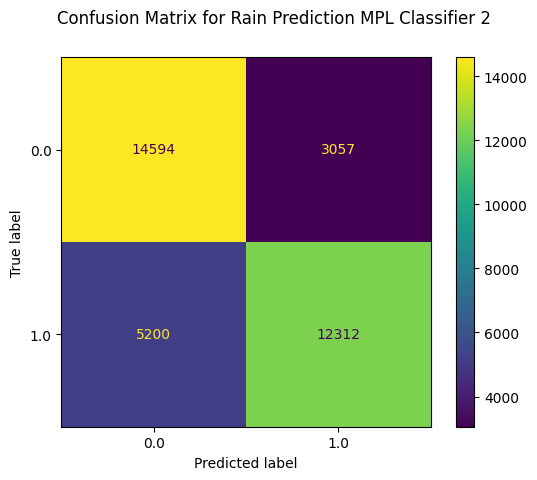

In [ ]:
print(classification_report(y2_test, pred_mplpc2))
from sklearn.metrics import ConfusionMatrixDisplay
fig = ConfusionMatrixDisplay.from_estimator(mlpc, x2_test, y2_test, display_labels=mlpc.classes_)
fig.figure_.suptitle("Confusion Matrix for Rain Prediction MPL Classifier 2")
plt.show()

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77     17651
         1.0       0.77      0.75      0.76     17512

    accuracy                           0.76     35163
   macro avg       0.76      0.76      0.76     35163
weighted avg       0.76      0.76      0.76     35163



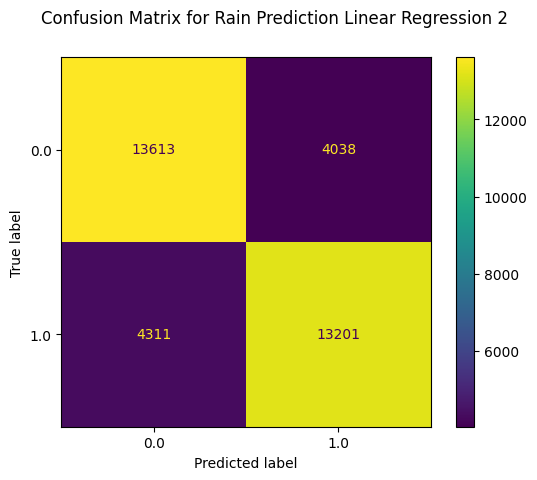

In [ ]:
print(classification_report(y2_test, pred_LR2))
from sklearn.metrics import ConfusionMatrixDisplay
fig = ConfusionMatrixDisplay.from_estimator(LR, x2_test, y2_test, display_labels=LR.classes_)
fig.figure_.suptitle("Confusion Matrix for Rain Prediction Linear Regression 2")
plt.show()

**以上**